In [5]:
from __future__ import division
import csv
import numpy as np
import matplotlib.pyplot as plt

#     This file is part of DELTADOGS package.
#     DELTADOGS is free software for global optimization of computationally expensive function evaluaitons
#     you can redistribute it and/or modify
#     it under the terms of the GNU General Public License as published by
#     the Free Software Foundation, either version 3 of the License, or
#     (at your option) any later version.
#     DELTADOGS is distributed in the hope that it will be useful,
#     but WITHOUT ANY WARRANTY; without even the implied warranty of
#     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#     GNU General Public License for more details.

#     You should have received a copy of the GNU General Public License
#     along with DELTADOGS.  If not, see <http://www.gnu.org/licenses/>.

# Author: Shahrouz Alimohammadi
# Modified: Dec. 2016


# KSE simulation using IMEXRKi4CBA(3s)
data1FilePath = "./UQ/data1.txt"



def readInputFile(filePath):
#     reads a time series data from a file

#    retVal = []
#    with open(filePath, 'rb') as csvfile:
#        filereader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#        for row in filereader:
#            retVal.append([int(row[0]), int(row[1]), int(row[2])])

    retVal=[]
    with open(filePath) as file:
         line=file.readline()
         arr=[float(a) for a in line.split(',')]
 #        retVal.append(file.readline())
         retVal.append(arr)
    return retVal[0]

def transient_detector(x=[]):
# transient_time_detector(x) is an automatic procedure to determine the nonstationary part a signal from the stationary part.
#  It finds the transient time of the simulation using the minimum variance intreval.
#  INPUT:
#  x: is the signal which after some transient part the signal becomes stationary
#  OUTPUT:
#  ind: is the index of signal that after that the signal could be considered as a stationry signal.

# If you use this code please cite:
# Beyhaghi, P., Alimohammadi, S., and Bewley, T., A multiscale, asymptotically unbiased approach to uncertainty quantification 
# in the numerical approximation of infinite time-averaged statistics. Submitted to Journal of Uncertainity Quantification. 

    N = len(x)
    k = np.int_([N/2])
    y = np.zeros((k, 1))
    for kk in np.arange(k):
        y[kk] = np.var(x[kk+1:])*1.0/(N-kk-1.0)
    y = np.array(-y)
    ind = y.argmax(0)
    print('index of transient point in the signal:')
    print(ind)
    return ind




# TEST
x = readInputFile(data1FilePath)
x = x[:10000]
index = transient_detector(x)





/Users/shahrouz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


index of transient point in the signal:
[183]


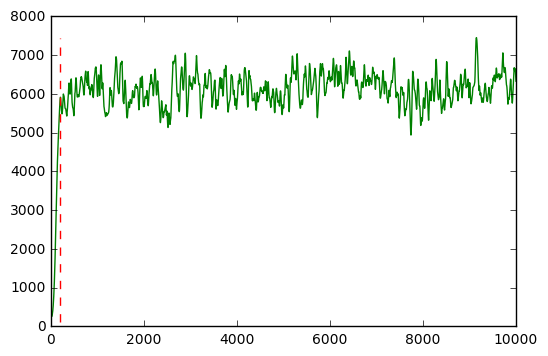

In [12]:
# sampled time intervals 1
t = np.arange(0., len(x))
# red dashes transient detector, green curve simulation results of KSE
plt.plot(t, x, '-g')
plt.plot([index,index], [np.min(x)/2.0, np.max(x)], '--r')
plt.show()

In [13]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)

In [25]:
np.max(points)

1.1000000000000001

In [24]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
# plt.show()
# tri.simplices

# points[tri.simplices]
tri.simplices[1,1]

1

In [30]:
from cvxpy import *
import numpy

# Problem data.
m = 30
n = 20
numpy.random.seed(1)
A = numpy.random.randn(m, n)
b = numpy.random.randn(m)

# Construct the problem.
x = Variable(n)
objective = Minimize(sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
# print(x.value)
The optimal Lagrange multiplier for a constraint
is stored in constraint.dual_value.
print(constraints[0].dual_value)

ImportError: No module named cvxpy